In [1]:
# Code that helps avoid overusing memory

import tensorflow as tf
tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True
sess = tf.Session(config=tf_config)
from keras import backend as K
K.set_session(sess)

Using TensorFlow backend.


In [54]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 2.0
    #xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    #fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    fig = plt.figure(figsize=(1,1), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [30]:
import os
import sys


#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
#Importing the VAE
from VAE.world_model_vae import VAE

/home/kaiolae/code/word_models_keras_test/WorldModels


In [31]:
#Loading Weights of trained VAE
vae = VAE()
vae.set_weights("../models/final_full_vae_weights.h5")

VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 32, 32, 32)   416         conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 16, 16, 32)   4128        conv2d_14[0][0]                  
_______________________

In [32]:
#Getting some data to feed into the VAE
import numpy as np
data = np.load("../data/obs_data_doomrnn_1.npy")


(100,)


[]

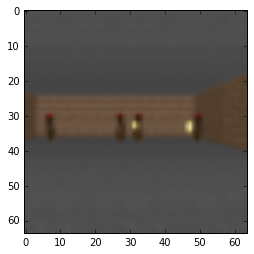

In [33]:
#Data: Dimensions are (rollout, timestep, x-axis, y-axis, colors)
print(data.shape)

selected_rollout = np.array(data[2])
selected_rollout = selected_rollout.astype('float32') / 255.
#print(selected_rollout.shape)

some_picture = selected_rollout[200]
some_picture.shape
plt.imshow(some_picture)
plt.plot()

In [34]:
#Testing reconstructing the data with the VAE
latent_values_for_rollout = vae.encoder.predict(np.array(selected_rollout))
latent_values_for_rollout.shape
#Cool! We can prove that we're actually compressing things here simply by looking at the shape of the latent variables.

(300, 16)

(300, 64, 64, 3)
[[[0.4177651  0.41884485 0.3907068 ]
  [0.40481204 0.39619955 0.38599932]
  [0.40366405 0.4063159  0.3811276 ]
  ...
  [0.39661714 0.3889864  0.3883745 ]
  [0.39937034 0.39859855 0.38185376]
  [0.42439005 0.4117375  0.40280595]]

 [[0.40631345 0.3919331  0.38692605]
  [0.3999158  0.38386157 0.36812827]
  [0.39476994 0.3828057  0.3706589 ]
  ...
  [0.39443326 0.38542482 0.37303677]
  [0.39140597 0.38287455 0.37188023]
  [0.41052994 0.38654822 0.37662894]]

 [[0.41101012 0.39055613 0.3789558 ]
  [0.40332678 0.3858369  0.36420724]
  [0.38790694 0.3787323  0.35996652]
  ...
  [0.39694092 0.38812423 0.36766976]
  [0.38571718 0.37554005 0.36322737]
  [0.4153031  0.39140025 0.37982783]]

 ...

 [[0.40948176 0.3949049  0.3844681 ]
  [0.39824674 0.38675895 0.3698996 ]
  [0.39976424 0.3847938  0.37771666]
  ...
  [0.39962628 0.39100796 0.3737953 ]
  [0.3948215  0.38731316 0.37345457]
  [0.40901947 0.3878679  0.37255403]]

 [[0.4112124  0.39165255 0.37909946]
  [0.4042873  0.3912

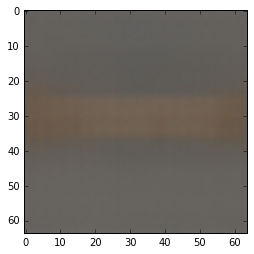

In [42]:
regenerated_images = vae.decoder.predict(latent_values_for_rollout)
print(regenerated_images.shape)
plt.imshow(regenerated_images[0])
print(regenerated_images[2])

In [55]:
plot_movie_mp4(selected_rollout)
plot_movie_mp4(regenerated_images)

<IPython.core.display.Javascript object>


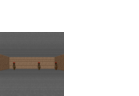

In [71]:
#Testing the matplotlib notebook style of inline plots.
#TODO Cannot find any way to change size...
%matplotlib notebook
fig = plt.figure(figsize=(1,1), dpi=72)
im = plt.figimage(selected_rollout[0])
def animate(i):
    im.set_array(selected_rollout[i])
    return (im,)

anim = animation.FuncAnimation(fig, animate, frames=len(selected_rollout))
display()
plt.show()

In [ ]:
#latent_variables = vae.encoder.predict(np.array(selected_rollout))
#reconstructions = vae.decoder.predict(np.array(latent_variables))
reconstructions = vae.model.predict(np.array(selected_rollout))
#print(latent_variables.shape)
#print(reconstructions.shape)
plt.imshow(reconstructions[100])
plt.show()
#Why difference between encode/decode and just sending straight through???